# Non Maximal Supression

## Import Libraries

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('dark_background')

In [52]:
image = cv2.imread('sample_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape

In [53]:
boxes = np.array([
    [227, 62, 723, 500, 0.95],  # Ground truth/highest score
    [220, 60, 715, 495, 0.9],
    [230, 65, 725, 510, 0.85],
    [240, 70, 730, 515, 0.75],
    [300, 100, 600, 480, 0.6],  # Smaller box
    [100, 50, 600, 400, 0.5]    # Slightly shifted box
])

## Visualize Bounding Boxes

In [54]:
def draw_boxes_on_image(img, boxes, title=''):
    img_copy = img.copy()
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(img_copy)
    ax.set_title(title)
    
    for box in boxes:
        x1, y1, x2, y2, score = box
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=2, edgecolor=(0, 0, 1), facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(x1, y1 - 10, f'{score:.2f}', color='white',
                bbox=dict(facecolor='blue', edgecolor='none', pad=1))
    
    ax.axis('off')
    plt.savefig(f'{title}.png', bbox_inches='tight')
    plt.show()

## Display Boxes Before NMS

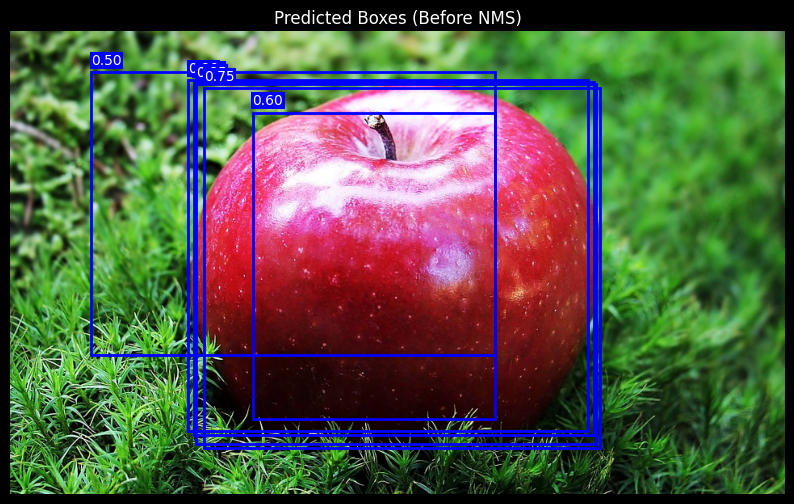

In [55]:
draw_boxes_on_image(image, boxes, title='Predicted Boxes (Before NMS)')

## Calculating Intersection over Union (IoU)

In [56]:
def iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

## The NMS Algorithm

In [57]:
def non_max_suppression(boxes, iou_threshold=0.3):
    if len(boxes) == 0:
        return []
    
    boxes = boxes[boxes[:, 4].argsort()[::-1]]  # Sort by score
    selected_boxes = []

    while len(boxes) > 0:
        chosen_box = boxes[0]
        selected_boxes.append(chosen_box)
        
        remaining_boxes = []
        for box in boxes[1:]:
            if iou(chosen_box, box) < iou_threshold:
                remaining_boxes.append(box)
        boxes = np.array(remaining_boxes)
    
    return np.array(selected_boxes)

## Applying NMS

In [58]:
nms_boxes = non_max_suppression(boxes, iou_threshold=0.3)

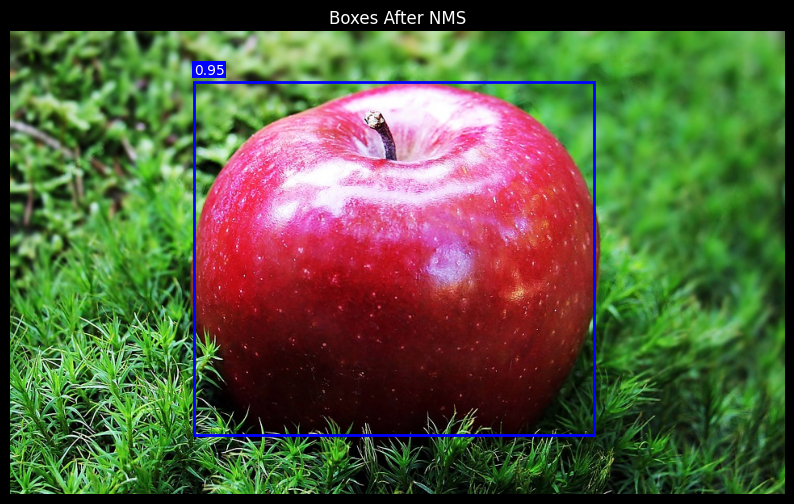

In [59]:
draw_boxes_on_image(image, nms_boxes, title='Boxes After NMS')

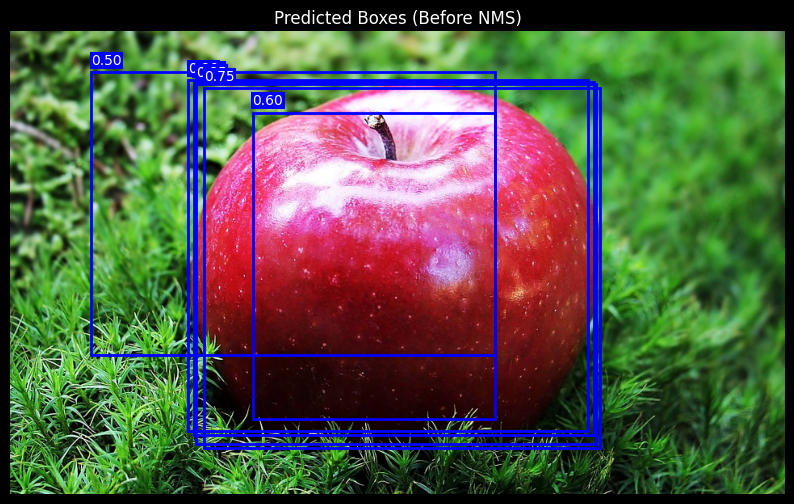

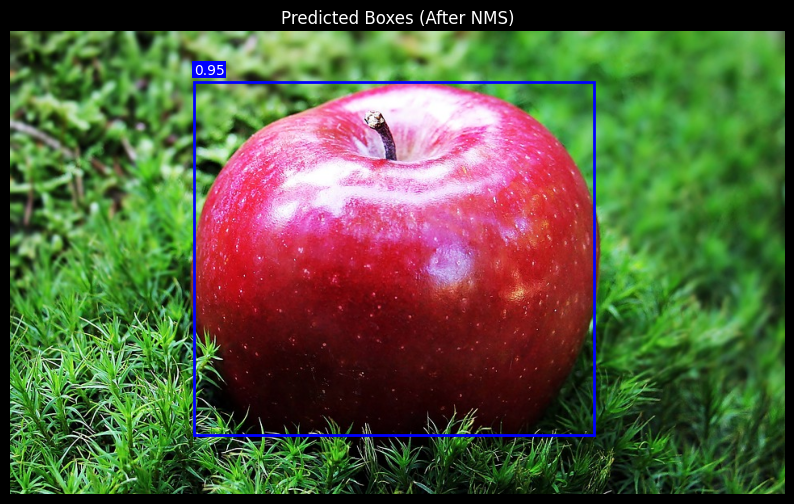

In [60]:
# Original boxes
draw_boxes_on_image(image, boxes, title='Predicted Boxes (Before NMS)')

# NMS-filtered boxes
draw_boxes_on_image(image, nms_boxes, title='Predicted Boxes (After NMS)')